    Perform Principal component analysis and perform clustering using first 
    3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
    optimum number of clusters and check whether we have obtained same number of clusters with the original data 
    (class column we have ignored at the begining who shows it has 3 clusters)df

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/Users/ayaskantsamal/Documents/EXCELR/assignments/wine.csv')

df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
#checking the original shape
df.shape

(178, 14)

In [4]:
# checking for null value and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
# dropping type col per instruction 
df.drop('Type',axis=1,inplace=True)

In [6]:
#Checking duplicate rows
df.duplicated().value_counts()

# No duplicated values 

False    178
dtype: int64

In [7]:
df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
# statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoids,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


    We are going to use standard scaler (MinMax scaler or scale can also be used) as for PCA it is better to get the data centered mean. 
    However with scale , there is a possiblity of data leak so it is not a good approach to use that.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
norm=scaler.fit_transform(df)
df_norm=pd.DataFrame(norm,columns=df.columns)

In [10]:
df_norm.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


    Lets validate couple of features to check the distribution after scaling

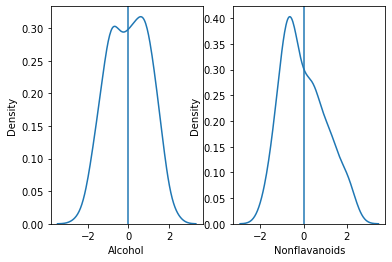

In [11]:
#checking the distribution after scaling
plt.subplot(1,2,1)
sns.kdeplot(data=df_norm["Alcohol"])
plt.axvline(df_norm["Alcohol"].mean())


plt.subplot(1,2,2)
sns.kdeplot(data=df_norm["Nonflavanoids"])
plt.axvline(df_norm["Nonflavanoids"].mean())

In [12]:
df_norm.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [13]:
df1=df_norm.copy()

# Lets check current state of clustering withour Diemnsion (or feature) reduction

### Hierarchical Clustering

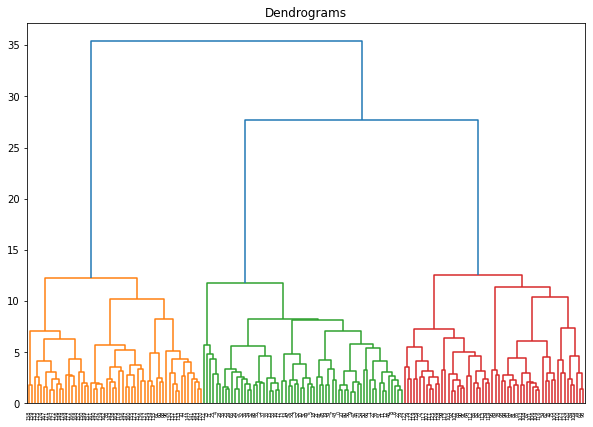

In [14]:
# Drawing the dendrogram

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(df1, method='ward'))

Number of iterations: 10
 silhouette score is 0.277, optimal number of clusters 3.


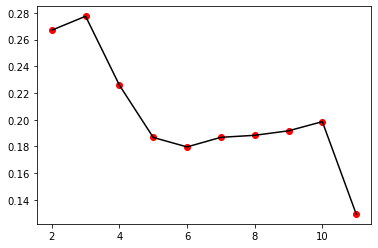

In [15]:
# loop to iterate through various cluster number and calculate the silhouette score


from sklearn.metrics import silhouette_score

scores=[]
hc_score=0
hc_cluster=0
cl=[]
i=0


for c in range(2,12):
    
    hc= AgglomerativeClustering(n_clusters=c, affinity = 'euclidean', linkage = 'ward')
    hc_pred = hc.fit_predict(df1)
    score= silhouette_score (df1, hc_pred, metric='euclidean')
    scores.append(score)
    cl.append(c)
    i=i+1
    if (score>=max(scores)):
        hc_score=round(score,3)
        hc_cluster=c
        
print("Number of iterations:",i)
        
print(" silhouette score is {}, optimal number of clusters {}.".format(hc_score,hc_cluster))



plt.plot(cl,scores,color="black")
plt.scatter(cl,scores,color="red")
plt.show() 



In [16]:
# Fitting the data 
hc = AgglomerativeClustering(n_clusters=hc_cluster, affinity = 'euclidean', linkage = 'ward')
hc_pred = hc.fit_predict(df1)


In [17]:
hc_df=df1.copy()
hc_df['Clusters']=hc_pred
hc_df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Clusters
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,2
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,2


In [18]:
# Using groupby function to sort by Clusters
hc_df.groupby(['Clusters']).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Clusters,,,,,,,,,,,,,
0,-0.984077,-0.356716,-0.553216,0.214306,-0.504823,-0.051565,0.059067,-0.052449,0.167592,-0.935539,0.449924,0.353896,-0.781673
1,0.075338,0.745293,0.169390,0.453018,0.008115,-0.962723,-1.186099,0.705947,-0.808785,0.775204,-1.037384,-1.249114,-0.388339
2,0.825899,-0.328857,0.353136,-0.590606,0.450396,0.889114,0.984307,-0.570172,0.555807,0.169529,0.499967,0.772256,1.048188


In [19]:
# the below tables shows number of customers in each cluster 

output = pd.DataFrame(data=hc_pred)

D=output[0].value_counts()

out=pd.concat([D], axis=1)
out.columns = [ 'Model:Ward']
print(out)

   Model:Ward
2          64
0          58
1          56


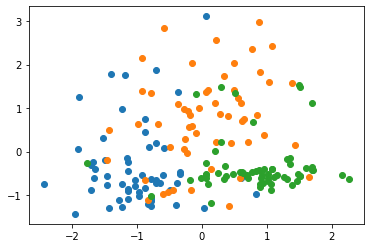

In [20]:
for i in set(hc_pred):
    plt.scatter(hc_df[hc_df["Clusters"]==i].iloc[:,0],hc_df[hc_df["Clusters"]==i].iloc[:,1])

### K-Means Clustering

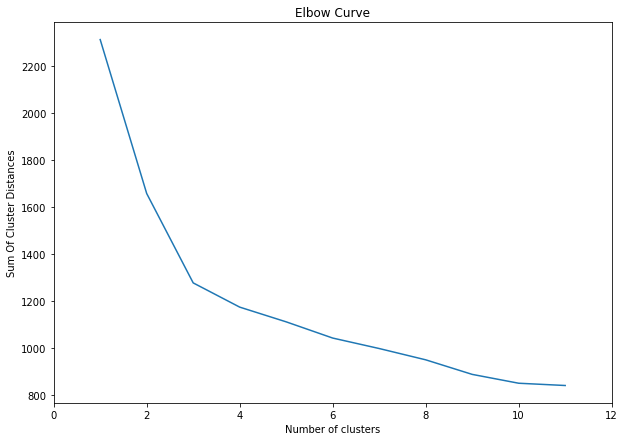

In [21]:
# Finding the optimum number of Clusters using Elbow curve

from sklearn.cluster import KMeans
iner = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df1)
    iner.append(kmeans.inertia_)
    
plt.figure(figsize=(10,7))    
plt.plot(range(1, 12), iner)
plt.title('Elbow Curve')
plt.xlim(0,12)
plt.xlabel('Number of clusters')
plt.ylabel('Sum Of Cluster Distances')
plt.show()

    We can see teh a sharp drop of value from 3 , so we will use a range from 2-5 for validation purpose

Number of iterations: 4
silhouette score is 0.286 , optimal number of clusters 3.


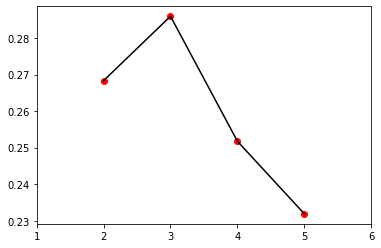

In [22]:
# creating a loop to iterate through possible optimum no of clusters
# calculating their silhouette scores 

scores=[]
cl=[]
km_score=0
km_cluster=0
i=0
for c in range(2,6):
    km= KMeans(n_clusters=c, random_state=0)
    km_pred = km.fit_predict(df1)
    score= silhouette_score (df1, km_pred, metric='euclidean')
    scores.append(score)
    cl.append(c)
    i=i+1
    if (score>=max(scores)):
        km_score=round(score,3)
        km_cluster=c
 
print("Number of iterations:",i)

print("silhouette score is {} , optimal number of clusters {}.".format(km_score,km_cluster))



plt.plot(cl,scores,color="black")
plt.scatter(cl,scores,color="red")
plt.xlim(1,6)
plt.show() 



For n_clusters = 2 The average silhouette_score is : 0.2683134097105213
For n_clusters = 3 The average silhouette_score is : 0.28485891918989864
For n_clusters = 4 The average silhouette_score is : 0.24519129323772165
For n_clusters = 5 The average silhouette_score is : 0.23223087806001866
For n_clusters = 6 The average silhouette_score is : 0.23533337693317755
For n_clusters = 7 The average silhouette_score is : 0.1544360375226889
For n_clusters = 8 The average silhouette_score is : 0.1470673407830689
For n_clusters = 9 The average silhouette_score is : 0.1663063963916615
For n_clusters = 10 The average silhouette_score is : 0.13462903548660346


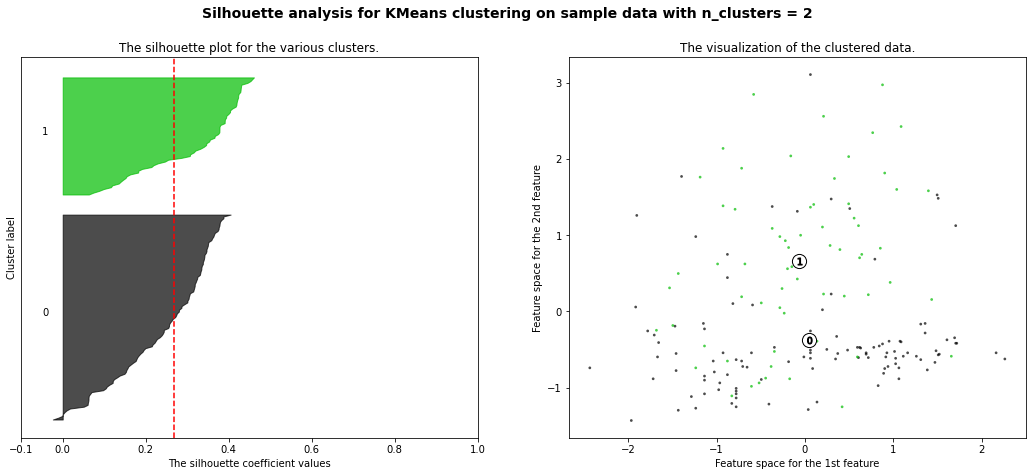

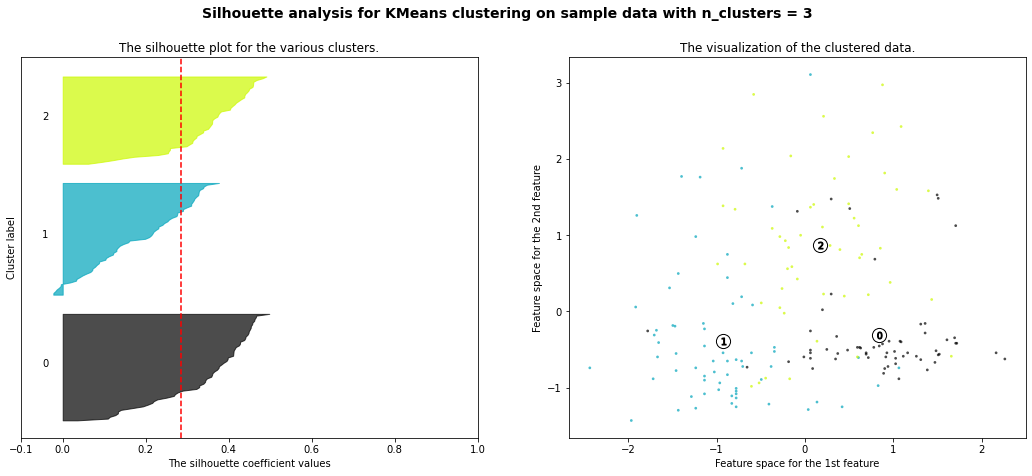

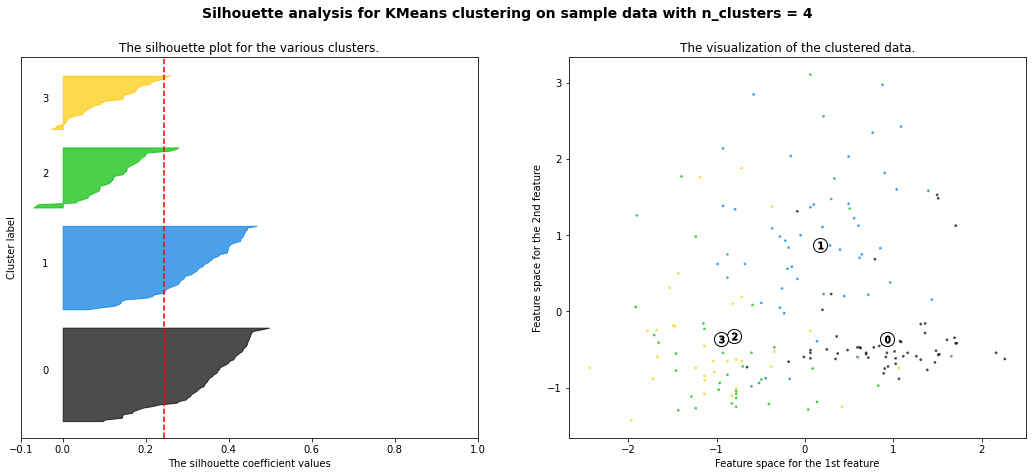

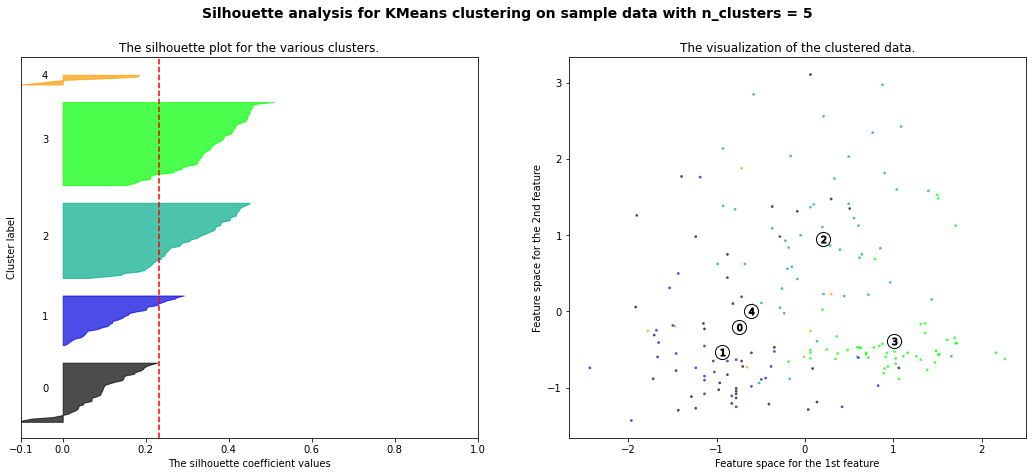

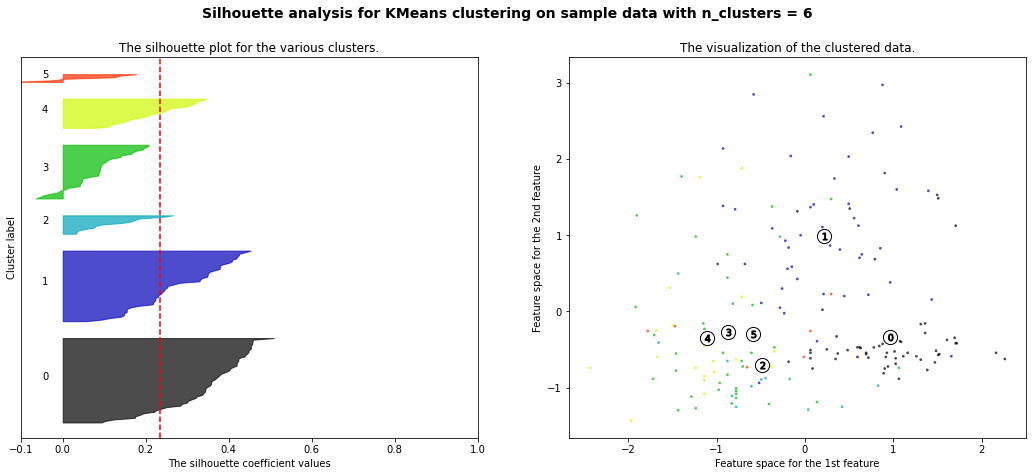

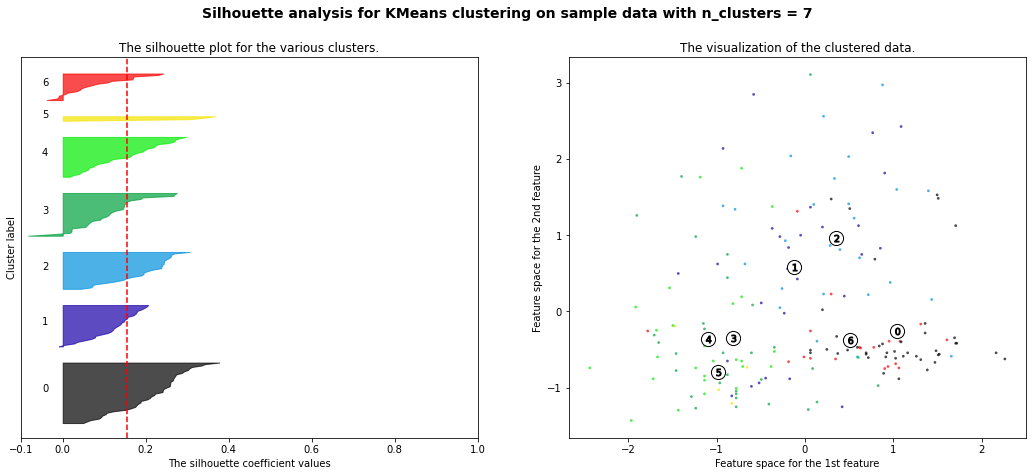

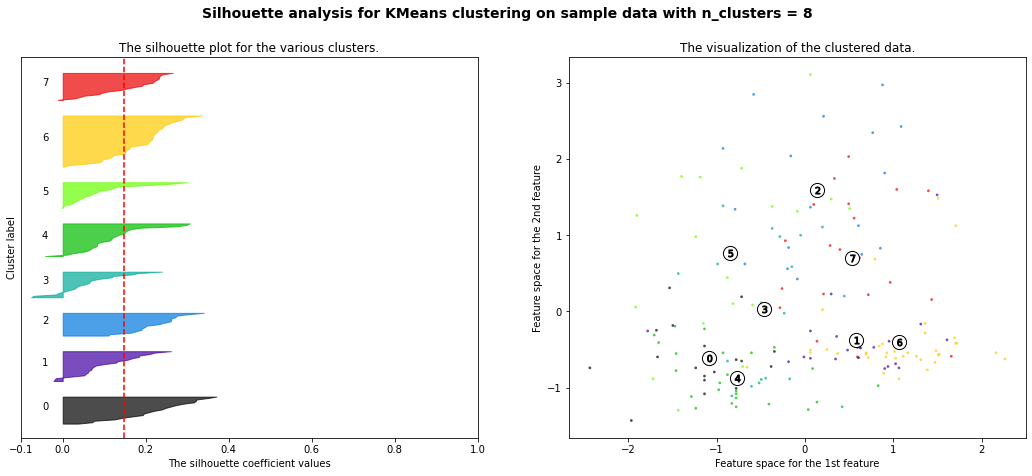

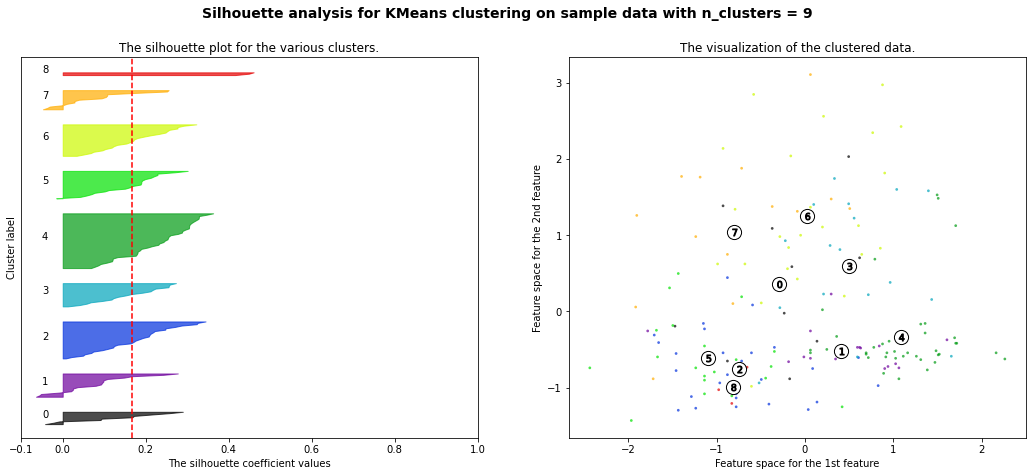

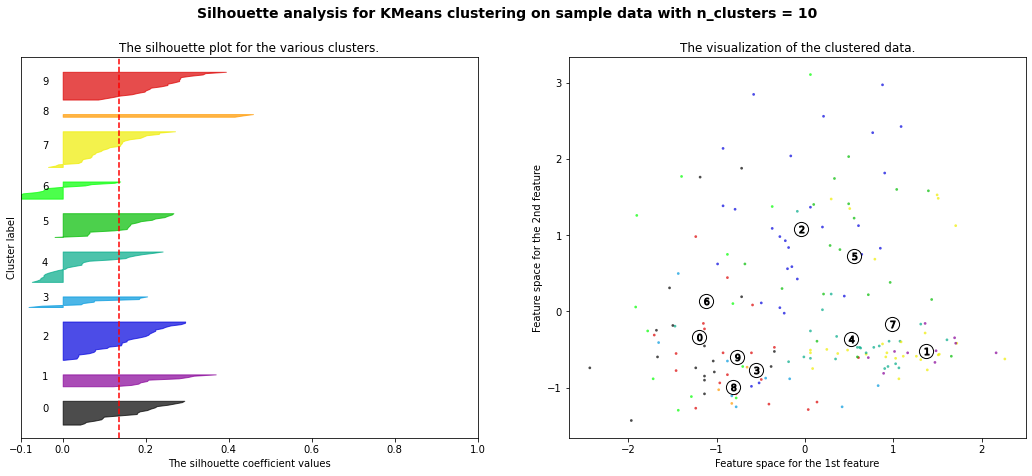

In [23]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df1) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df1.iloc[:, 0], df1.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [24]:
# Fitting with 3 clusters

km= KMeans(n_clusters=km_cluster, random_state=0)
km_pred = km.fit_predict(df1)

km_df=df1.copy()
km_df['Clusters']=km_pred
km_df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Clusters
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,2
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,2


In [25]:
# using Groupby
km_df.groupby(['Clusters']).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Clusters,,,,,,,,,,,,,
0,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088
1,-0.939003,-0.391966,-0.439201,0.208988,-0.463774,-0.053348,0.066904,-0.019822,0.064792,-0.882075,0.452982,0.289738,-0.756026
2,0.878097,-0.304576,0.318942,-0.664524,0.564888,0.876505,0.943639,-0.585590,0.581783,0.167188,0.483728,0.767053,1.158347


In [26]:
# the below tables shows number of customers in each cluster 

output = pd.DataFrame(data=km_pred)

D=output[0].value_counts()

#out=pd.concat([D], axis=1)
out.columns = [ 'Cluster:KM']
print(out)

   Cluster:KM
2          64
0          58
1          56


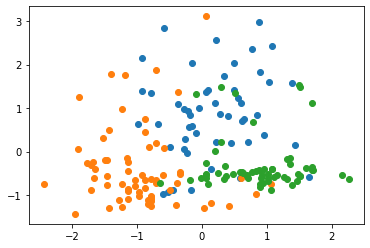

In [27]:
for i in set(hc_pred):
    plt.scatter(km_df[km_df["Clusters"]==i].iloc[:,0],km_df[km_df["Clusters"]==i].iloc[:,1])

    Both KM model and Hirerachy appears to be same

## Using PCA

    PCA has 13 features with the current dataset , so we need to keep the value to n_component to 13 and then find the best features

In [28]:
pca = PCA(n_components=13)
pca.fit(df1)


PCA(n_components=13)

In [29]:
# calculating variance and cumulative variance
variance = pca.explained_variance_ratio_

cumulative_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)# calculating cumulative variance
cumulative_var

array([36.2, 55.4, 66.5, 73.6, 80.2, 85.1, 89.3, 92. , 94.2, 96.1, 97.8,
       99.1, 99.9])

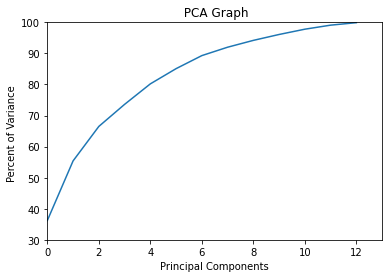

In [30]:
# plotting the graph with commulative scores
plt.plot(cumulative_var)

plt.xlabel('Principal Components')

plt.ylabel('Percent of Variance ')

plt.title(' PCA Graph')
plt.ylim(30,100)
plt.xlim(0,13)
plt.show()



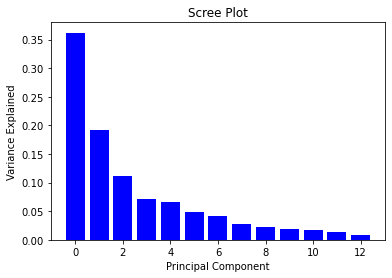

In [31]:
# plotting a graph with individual variance just for validation
PC_values = np.arange(pca.n_components_)
plt.bar(PC_values, variance, linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [32]:
variance,PC_values

(array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
        0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
        0.01736836, 0.01298233, 0.00795215]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]))

In [33]:
# with 3 principal components tranformation 
pca = PCA(n_components=3)
pca.fit(df1)

pca_array= pca.transform(df1)
df_pca = pd.DataFrame(pca_array,columns=['PC1','PC2','PC3'])
df_pca.head()


,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


In [34]:
print("original shape before PCA: ", df1.shape)
print("transformed shape after PCA: ", df_pca.shape)

original shape before PCA:  (178, 13)
transformed shape after PCA:  (178, 3)


## Hierarchical clustering with PCA

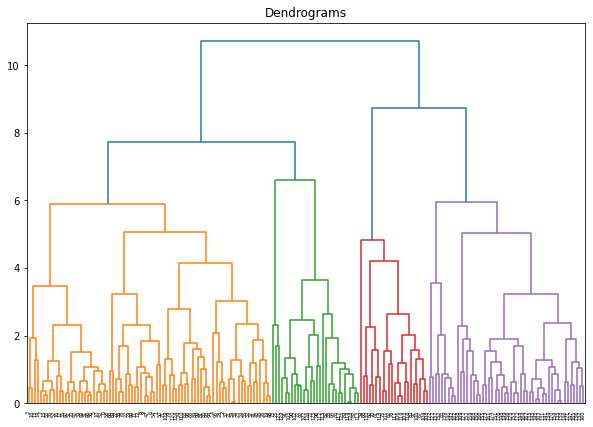

In [35]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(df_pca, method='complete'))

 silhouette score is 0.446, optimal number of cluster 3.


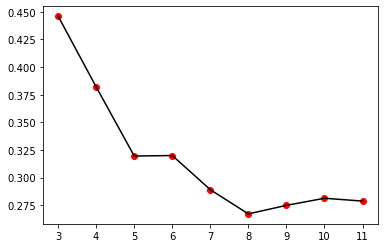

In [36]:
# Creating a loop to iterate through various cluster number and calculate the silhouette score
# Cluster number having highest silhouette score will be chosen to fit the model

from sklearn.metrics import silhouette_score

scores=[]
cl=[]
hc_pca_score=0
hc_pca_cluster=0
i=0

for c in range(3,12):
    
    hc= AgglomerativeClustering(n_clusters=c, affinity = 'euclidean', linkage = 'ward')
    hc_pred = hc.fit_predict(df_pca)
    score= silhouette_score (df_pca, hc_pred, metric='euclidean')
    scores.append(score)
    cl.append(c)
    i=i+1
    if (score>=max(scores)):
        hc_pca_score=round(score,3)
        hc_pca_cluster=c
        
        
print(" silhouette score is {}, optimal number of cluster {}.".format(hc_pca_score,hc_pca_cluster))

plt.plot(cl,scores,color="black")
plt.scatter(cl,scores,color="red")
plt.show() 



In [37]:
# Fitting the data with 3 clusters
hc_pca= AgglomerativeClustering(n_clusters=hc_pca_cluster, affinity = 'euclidean', linkage = 'ward')
hc_pca_pred = hc_pca.fit_predict(df_pca)
hc_pca_df=df_pca.copy()
hc_pca_df['Clusters']=hc_pca_pred
hc_pca_df.head()

,PC1,PC2,PC3,Clusters
0,3.316751,-1.443463,-0.165739,2
1,2.209465,0.333393,-2.026457,2
2,2.516740,-1.031151,0.982819,2
3,3.757066,-2.756372,-0.176192,2
4,1.008908,-0.869831,2.026688,2


In [38]:
# Using groupby function to sort by Clusters
hc_pca_df.groupby(['Clusters']).mean()

,PC1,PC2,PC3
Clusters,,,
0,-0.240234,1.719897,0.163079
1,-2.782034,-1.272012,-0.136247
2,2.255555,-0.826594,-0.067071


/var/folders/2q/mbjnnv1x4x701wdq7m9tmg3m0000gn/T/ipykernel_59733/302530455.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.3,alpha = 0.2)


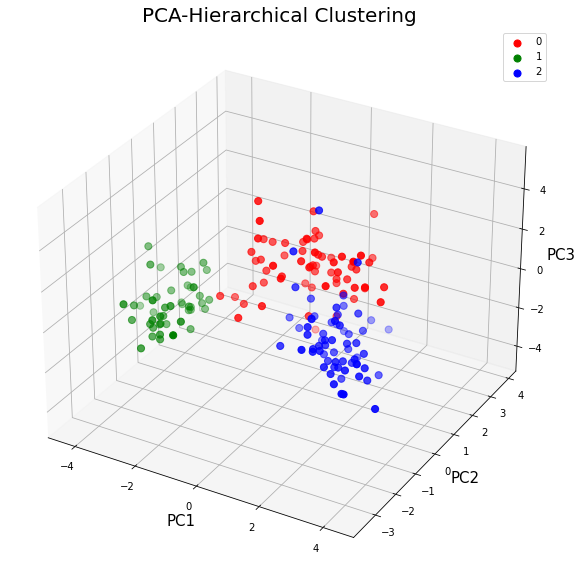

In [39]:
from mpl_toolkits import mplot3d

# Creating figure
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection ="3d")


# Add x, y gridlines
ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.3,alpha = 0.2)

ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_zlabel('PC3', fontsize = 15)

ax.set_title('PCA-Hierarchical Clustering', fontsize = 20)

clusters = [0,1,2]
colors = ['r', 'g', 'b']

for cluster, color in zip(clusters,colors):
    
    indicesToKeep = hc_pca_df['Clusters'] == cluster
    ax.scatter(hc_pca_df.loc[indicesToKeep, 'PC1'],hc_pca_df.loc[indicesToKeep, 'PC2'],hc_pca_df.loc[indicesToKeep, 'PC3'], c =color, s = 50)
    
ax.legend(clusters)   

## K-Means Clustering with PCA

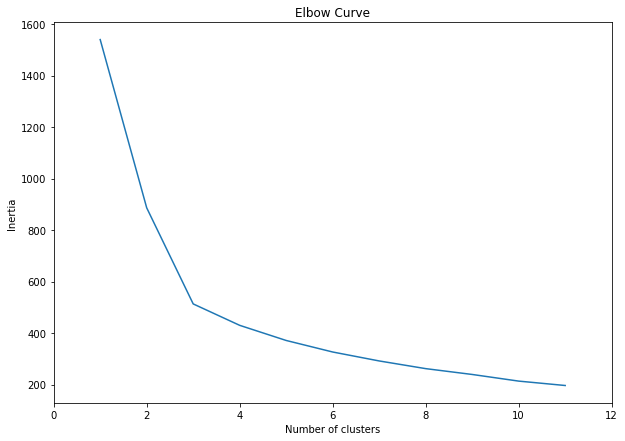

In [40]:
# Finding the optimum number of Clusters using Elbow curve

from sklearn.cluster import KMeans
iner = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_pca)
    iner.append(kmeans.inertia_)
    
plt.figure(figsize=(10,7))    
plt.plot(range(1, 12), iner)
plt.title('Elbow Curve')
plt.xlim(0,12)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

 silhouette score  0.453,  optimal number of clusters 3.


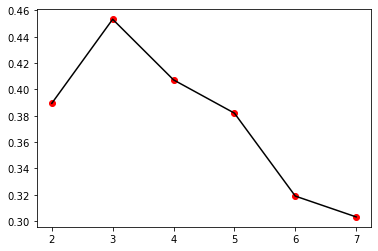

In [41]:
# creating a loop to iterate through possible optimum no of clusters
# calculating their silhouette scores 

scores=[]
cl=[]
km_pca_score=0
km_pca_cluster=0
i=0
for c in range(2,8):
    km= KMeans(n_clusters=c, random_state=0)
    km_pred = km.fit_predict(df_pca)
    score= silhouette_score (df_pca, km_pred, metric='euclidean')
    scores.append(score)
    cl.append(c)
    i=i+1
    if (score>=max(scores)):
        km_pca_score=round(score,3)
        km_pca_cluster=c
        
print(" silhouette score  {},  optimal number of clusters {}.".format(km_pca_score,km_pca_cluster))



plt.plot(cl,scores,color="black")
plt.scatter(cl,scores,color="red")
plt.show() 



In [42]:
# Fitting the data with 3 clusters
km_pca= KMeans(n_clusters=km_pca_cluster, random_state=0)
km_pca_pred = km_pca.fit_predict(df_pca)

km_pca_df=df_pca.copy()
km_pca_df['Clusters']=km_pca_pred
km_pca_df.head()

,PC1,PC2,PC3,Clusters
0,3.316751,-1.443463,-0.165739,2
1,2.209465,0.333393,-2.026457,2
2,2.516740,-1.031151,0.982819,2
3,3.757066,-2.756372,-0.176192,2
4,1.008908,-0.869831,2.026688,2


In [43]:
# Using groupby function to sort by Clusters
km_pca_df.groupby(['Clusters']).mean()

,PC1,PC2,PC3
Clusters,,,
0,-2.720036,-1.125651,-0.239093
1,-0.072720,1.777544,0.192644
2,2.275808,-0.894518,-0.002150


/var/folders/2q/mbjnnv1x4x701wdq7m9tmg3m0000gn/T/ipykernel_59733/3998628842.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.3,alpha = 0.2)


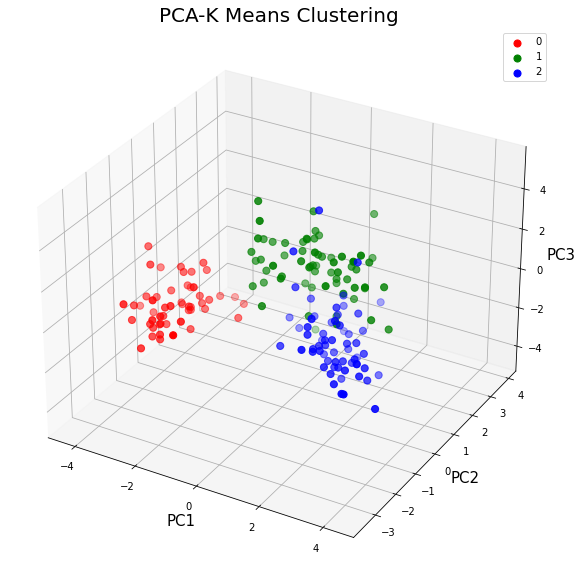

In [44]:
from mpl_toolkits import mplot3d

# Creating figure
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection ="3d")


# Add x, y gridlines
ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.3,alpha = 0.2)

ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_zlabel('PC3', fontsize = 15)

ax.set_title('PCA-K Means Clustering', fontsize = 20)

clusters = [0,1,2]
colors = ['r', 'g', 'b']

for cluster, color in zip(clusters,colors):
    
    indicesToKeep = km_pca_df['Clusters'] == cluster
    ax.scatter(km_pca_df.loc[indicesToKeep, 'PC1'],km_pca_df.loc[indicesToKeep, 'PC2'],km_pca_df.loc[indicesToKeep, 'PC3'], c =color, s = 50)
    
ax.legend(clusters)   

In [45]:
final={'Models':['Hierarchical','K-Means','PCA-Hierarchical','PCA-K-Means'],
   'Clusters predicted':[hc_cluster,km_cluster,hc_pca_cluster,km_pca_cluster],
   'Max Silhouette score':[hc_score,km_score,hc_pca_score,km_pca_score]}
clust=pd.DataFrame(final)

In [46]:
clust

,Models,Clusters predicted,Max Silhouette score
0,Hierarchical,3,0.277
1,K-Means,3,0.286
2,PCA-Hierarchical,3,0.446
3,PCA-K-Means,3,0.453




+ Increase in score after PCA with 3 features which signifies the data grouping was peformed better with PCA.

+ K means have the highest score, so we can use that for our clustering, although the data allocation after clustering (as compalred to hirerchial clustering) is exactly same 